In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.4, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_pts, random_state=123, centers=centers, cluster_std=0.4)
# print(X)
# print(y)


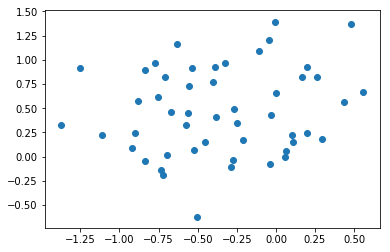

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])


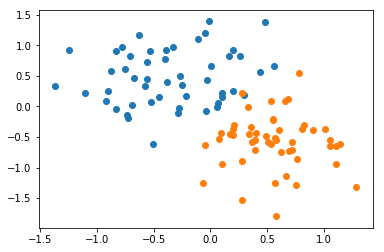

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [15]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        return 1 if pred >= 0.5 else 0


In [16]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [17]:
[w,b] = model.parameters()
print(w, b)
w1, w2 = w.view(2)
b1 = b[0]
print(w1.item(), w2.item(), b1.item())

def get_params():
    return (w1.item(), w2.item(), b1.item())
    

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True) Parameter containing:
tensor([0.1939], requires_grad=True)
0.16220331192016602 -0.1682732105255127 0.19390898942947388


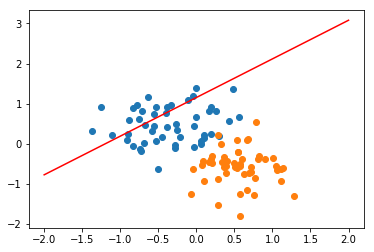

In [18]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1) / -w2
    plt.plot(x1, x2, 'r')
    scatter_plot()
    
plot_fit('Initial model')

In [19]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(100,1)

In [20]:
# Training

epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss', loss.item())

    losses.append(loss)
    optimizer.zero_grad() # initialize gradient to 0
    loss.backward()
    optimizer.step()
    

epoch: 0 loss 0.6226662397384644
epoch: 1 loss 0.6217162013053894
epoch: 2 loss 0.6207691431045532
epoch: 3 loss 0.619825005531311
epoch: 4 loss 0.6188837289810181
epoch: 5 loss 0.6179456114768982
epoch: 6 loss 0.6170098185539246
epoch: 7 loss 0.6160772442817688
epoch: 8 loss 0.6151475310325623
epoch: 9 loss 0.6142207980155945
epoch: 10 loss 0.6132964491844177
epoch: 11 loss 0.6123751997947693
epoch: 12 loss 0.6114566922187805
epoch: 13 loss 0.610541045665741
epoch: 14 loss 0.6096282005310059
epoch: 15 loss 0.6087179780006409
epoch: 16 loss 0.6078106760978699
epoch: 17 loss 0.606905996799469
epoch: 18 loss 0.6060042381286621
epoch: 19 loss 0.6051051616668701
epoch: 20 loss 0.6042088270187378
epoch: 21 loss 0.6033151745796204
epoch: 22 loss 0.6024242639541626
epoch: 23 loss 0.6015360355377197
epoch: 24 loss 0.6006505489349365
epoch: 25 loss 0.5997676849365234
epoch: 26 loss 0.5988876223564148
epoch: 27 loss 0.598010241985321
epoch: 28 loss 0.5971353054046631
epoch: 29 loss 0.59626299142

epoch: 307 loss 0.42918986082077026
epoch: 308 loss 0.4287831783294678
epoch: 309 loss 0.42837774753570557
epoch: 310 loss 0.42797303199768066
epoch: 311 loss 0.4275693893432617
epoch: 312 loss 0.42716678977012634
epoch: 313 loss 0.42676517367362976
epoch: 314 loss 0.4263642132282257
epoch: 315 loss 0.42596450448036194
epoch: 316 loss 0.4255656898021698
epoch: 317 loss 0.42516767978668213
epoch: 318 loss 0.4247708022594452
epoch: 319 loss 0.42437487840652466
epoch: 320 loss 0.423979789018631
epoch: 321 loss 0.42358577251434326
epoch: 322 loss 0.42319244146347046
epoch: 323 loss 0.42280009388923645
epoch: 324 loss 0.42240890860557556
epoch: 325 loss 0.42201846837997437
epoch: 326 loss 0.4216289520263672
epoch: 327 loss 0.4212404191493988
epoch: 328 loss 0.420852929353714
epoch: 329 loss 0.42046603560447693
epoch: 330 loss 0.420080304145813
epoch: 331 loss 0.4196954369544983
epoch: 332 loss 0.41931137442588806
epoch: 333 loss 0.41892823576927185
epoch: 334 loss 0.41854608058929443
epoch:

epoch: 609 loss 0.3393409252166748
epoch: 610 loss 0.3391241729259491
epoch: 611 loss 0.33890777826309204
epoch: 612 loss 0.3386918604373932
epoch: 613 loss 0.338476300239563
epoch: 614 loss 0.3382611572742462
epoch: 615 loss 0.33804622292518616
epoch: 616 loss 0.33783185482025146
epoch: 617 loss 0.33761778473854065
epoch: 618 loss 0.3374042510986328
epoch: 619 loss 0.3371908664703369
epoch: 620 loss 0.3369779884815216
epoch: 621 loss 0.3367655575275421
epoch: 622 loss 0.3365533947944641
epoch: 623 loss 0.33634161949157715
epoch: 624 loss 0.3361302316188812
epoch: 625 loss 0.33591920137405396
epoch: 626 loss 0.3357085883617401
epoch: 627 loss 0.33549830317497253
epoch: 628 loss 0.3352884352207184
epoch: 629 loss 0.3350788354873657
epoch: 630 loss 0.3348698019981384
epoch: 631 loss 0.33466097712516785
epoch: 632 loss 0.3344525396823883
epoch: 633 loss 0.33424457907676697
epoch: 634 loss 0.33403682708740234
epoch: 635 loss 0.33382952213287354
epoch: 636 loss 0.333622545003891
epoch: 637 

epoch: 917 loss 0.28698205947875977
epoch: 918 loss 0.286848783493042
epoch: 919 loss 0.28671562671661377
epoch: 920 loss 0.2865826487541199
epoch: 921 loss 0.28644999861717224
epoch: 922 loss 0.286317378282547
epoch: 923 loss 0.28618502616882324
epoch: 924 loss 0.28605279326438904
epoch: 925 loss 0.28592079877853394
epoch: 926 loss 0.28578895330429077
epoch: 927 loss 0.28565728664398193
epoch: 928 loss 0.285525918006897
epoch: 929 loss 0.285394549369812
epoch: 930 loss 0.2852635085582733
epoch: 931 loss 0.2851325571537018
epoch: 932 loss 0.28500184416770935
epoch: 933 loss 0.2848712205886841
epoch: 934 loss 0.2847408652305603
epoch: 935 loss 0.28461065888404846
epoch: 936 loss 0.28448066115379333
epoch: 937 loss 0.2843509018421173
epoch: 938 loss 0.2842211425304413
epoch: 939 loss 0.28409162163734436
epoch: 940 loss 0.28396230936050415
epoch: 941 loss 0.2838331460952759
epoch: 942 loss 0.2837041914463043
epoch: 943 loss 0.2835753560066223
epoch: 944 loss 0.2834467887878418
epoch: 945 

Text(0.5, 0, 'Epoch')

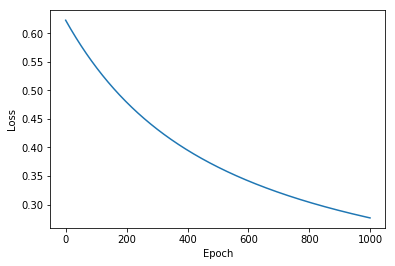

In [21]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

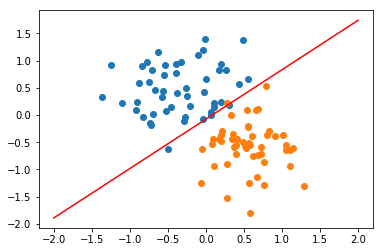

In [22]:
plot_fit('Trained Model')

Red point positive prob = 0.9366839528083801
Black point positive prob = 0.051466383039951324
Red point in class 1
Black point in class 0


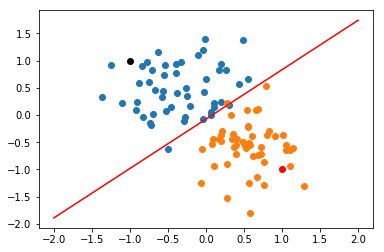

In [26]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print('Red point positive prob = {}'.format(model.forward(point1).item()))
print('Black point positive prob = {}'.format(model.forward(point2).item()))

print('Red point in class {}'.format(model.predict(point1)))
print('Black point in class {}'.format(model.predict(point2)))

plot_fit('Trained Model')